In [246]:
#!pip install tensorflow pandas sklearn numpy

## Goals

 - Loading the frames generated by our `simulator.py`
     - TODO: Generate Realtime System Simulations with different behaviours (No, Medium or Strong Perturbations)
     - TODO: Label the frames correctly
 - Preprocess the frames
 - Select a first model for experimentation purposes (TensorFlow)
 - Train the model on the loaded frames
 - Analyze the model performance on newly generated frames
 - Adjust either the model or the simulator and repeat all the steps above.

In [247]:
import tensorflow as tf

In [248]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [249]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

In [250]:
tf.__version__

'2.1.0'

In [251]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [252]:
train_dir = os.path.join(".", 'frames', 'train')
validation_dir = os.path.join(".", 'frames', 'valid')

In [253]:
train_stable_dir = os.path.join(train_dir, 'stable')
train_malfunction_dir = os.path.join(train_dir, 'malfunction')

validation_stable_dir = os.path.join(validation_dir, 'stable')
validation_malfunction_dir = os.path.join(validation_dir, 'malfunction')

In [254]:
train_stable_num = len(os.listdir(train_stable_dir))
train_malfunction_num = len(os.listdir(train_malfunction_dir))

validation_stable_num = len(os.listdir(validation_stable_dir))
validation_malfunction_num = len(os.listdir(validation_malfunction_dir))

total_train = train_stable_num + train_malfunction_num
total_validation = validation_stable_num + validation_malfunction_num

In [255]:
print('total training stable images:', train_stable_num)
print('total training malfunction images:', train_malfunction_num)

print('total validation stable images:', validation_stable_num)
print('total validation malfunction images:', validation_malfunction_num)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_validation)

total training stable images: 500
total training malfunction images: 500
total validation stable images: 500
total validation malfunction images: 500
--
Total training images: 1000
Total validation images: 1000


In [256]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [257]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [258]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [259]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [260]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [261]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 50176)            

In [262]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=total_validation // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 7 steps
Epoch 1/15
7/7 [==============================] - 42s 6s/step - loss: 1.5343 - accuracy: 0.5745 - val_loss: 0.6009 - val_accuracy: 0.5000
Epoch 2/15
7/7 [==============================] - 47s 7s/step - loss: 0.5037 - accuracy: 0.6685 - val_loss: 0.4394 - val_accuracy: 0.7578
Epoch 3/15
7/7 [==============================] - 49s 7s/step - loss: 0.2095 - accuracy: 0.9472 - val_loss: 0.1663 - val_accuracy: 0.9688
Epoch 4/15
7/7 [==============================] - 68s 10s/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9431
Epoch 5/15
7/7 [==============================] - 62s 9s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1451 - val_accuracy: 0.9565
Epoch 6/15
7/7 [==============================] - 53s 8s/step - loss: 2.2057e-04 - accuracy: 1.0000 - val_loss: 0.1307 - val_accuracy: 0.9576
Epoch 7/15
7/7 [==============================] - 48s 7s/step - loss: 5.7233e

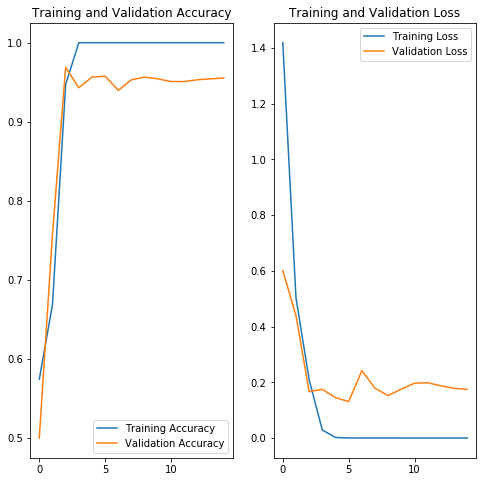

In [263]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()